# Видео 2

## Задача 1
Найдите производные функции:

1. $ y=\dfrac{x}{(1-x)^2(1+x)^3} $
2. $ y=\dfrac{x^p(1-x)^q}{1+x}$ , где $p,\ q$ — константы.

In [3]:
import sympy as sp
from sympy import symbols, Function, diff, simplify

# --- Уравнение 1 ---
x = symbols('x')
y1 = x / ((1 - x)**2 * (1 + x)**3)
dy1 = simplify(diff(y1, x))
print("Производная уравнения 1:")
sp.pprint(dy1)

# --- Уравнение 2 ---
p, q = symbols('p q')
y2 = (x**p * (1 - x)**q) / (1 + x)
dy2 = simplify(diff(y2, x))
print("Производная уравнения 2:")
sp.pprint(dy2)

Производная уравнения 1:
-3⋅x⋅(x - 1) - 2⋅x⋅(x + 1) + (x - 1)⋅(x + 1)
────────────────────────────────────────────
                    3        4              
             (x - 1) ⋅(x + 1)               
Производная уравнения 2:
     p        q + 1              p + 1        q            p + 1        q + 1
- p⋅x ⋅(1 - x)     ⋅(x + 1) + q⋅x     ⋅(1 - x) ⋅(x + 1) + x     ⋅(1 - x)     
─────────────────────────────────────────────────────────────────────────────
                                              2                              
                             x⋅(x - 1)⋅(x + 1)                               


## Задача 2
Найдите $f'(1)$, если

$ f(x)=x+ (x-1) \arcsin \left(\sqrt{\frac{x}{x+1}}\right)$

с помощью графика (постройте на графике две пересекающихся прямых в необходимой точке) и с помощью аналитического решения.

Аналитическое значение f'(1):
π    
─ + 1
4    


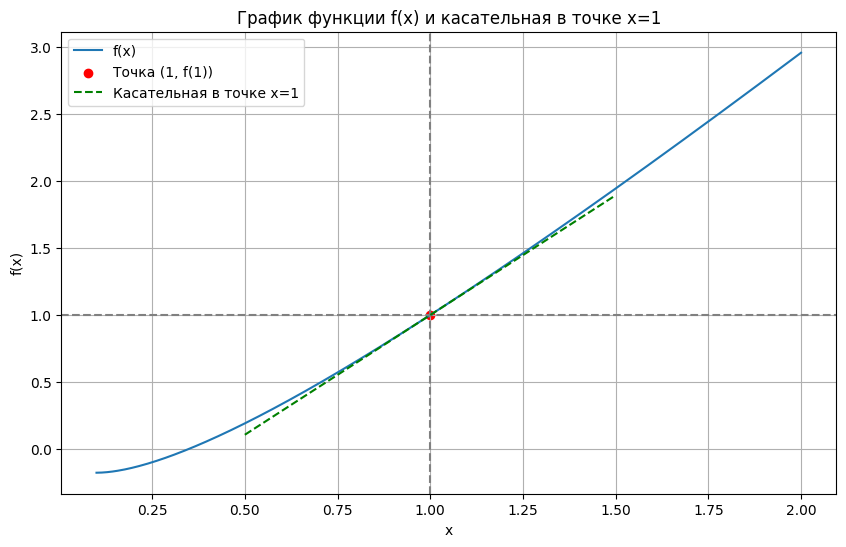

Графическое значение f'(1): 1.7853981633974483


In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Определение переменной и функции
x = sp.symbols('x')
f = x + (x - 1) * sp.asin(sp.sqrt(x / (x + 1)))
f_prime = sp.diff(f, x)
f_prime_at_1 = f_prime.subs(x, 1)
print("Аналитическое значение f'(1):")
sp.pprint(f_prime_at_1)

# Графический метод
f_func = sp.lambdify(x, f, "numpy")
f_prime_func = sp.lambdify(x, f_prime, "numpy")
x_vals = np.linspace(0.1, 2, 400)
y_vals = f_func(x_vals)
dy_dx_vals = f_prime_func(x_vals)
x_1 = 1
y_1 = f_func(x_1)
slope_1 = dy_dx_vals[np.where(np.isclose(x_vals, x_1))][0]

# Построение графика и касательная в точке x=1
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(x_1, y_1, color='red', label='Точка (1, f(1))')
plt.axhline(y=y_1, color='gray', linestyle='--')
plt.axvline(x=x_1, color='gray', linestyle='--')

tangent_x = np.linspace(x_1 - 0.5, x_1 + 0.5, 100)
tangent_y = slope_1 * (tangent_x - x_1) + y_1
plt.plot(tangent_x, tangent_y, 'g--', label='Касательная в точке x=1')

plt.title('График функции f(x) и касательная в точке x=1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print("Графическое значение f'(1):", slope_1)

## Задача 3
Найдите производную для неявной функции и её значение при $x=2,\ y=4$.

$ x^2 + 2xy - y^2 - 2x = 0$

Найдите касательную к кривой в точке $x=2,\ y=4$ и сравните угол наклона касательной с полученной производной.

In [6]:
import sympy as sp

# Определение переменных, неявной функции
x, y = sp.symbols('x y')
F = x**2 + 2*x*y - y**2 - 2*x

# производные
dF_dx = sp.diff(F, x)
dF_dy = sp.diff(F, y)
dy_dx = -dF_dx / dF_dy
dy_dx_at_point = dy_dx.subs({x: 2, y: 4})

# Уравнение касательной
x0, y0 = 2, 4
m = dy_dx_at_point
tangent_line = y - y0 - m * (x - x0)

# Вывод результатов
print("Производная dy/dx:")
sp.pprint(dy_dx)
print("Значение производной в точке (2, 4):", dy_dx_at_point)
print("Уравнение касательной:")
sp.pprint(sp.simplify(tangent_line))

Производная dy/dx:
-2⋅x - 2⋅y + 2
──────────────
  2⋅x - 2⋅y   
Значение производной в точке (2, 4): 5/2
Уравнение касательной:
  5⋅x        
- ─── + y + 1
   2         


## Задача 4
Закон движения точки по оси $0x$ задаётся формулой

$x=10t+5t^2$, где $t$ — время в секундах, а $x$ — расстояние в метрах.

Найдите мгновенную скорость движения, когда $t=20$. Вычислите значение численно и аналитически, когда $\Delta t = 0.1$, $\Delta t = 0.01$. Сравните ошибку между аналитическим и численным решением.

In [7]:
import sympy as sp

t = sp.symbols('t')
x = 10*t + 5*t**2

# Аналитическое решение
v_analytical = sp.diff(x, t)
v_analytical_at_t20 = v_analytical.subs(t, 20)

# Численное решение
def numerical_velocity(x_expr, t_val, delta_t):
    x_t = x_expr.subs(t, t_val)
    x_t_plus_dt = x_expr.subs(t, t_val + delta_t)
    return (x_t_plus_dt - x_t) / delta_t

# Точное значение скорости в t=20
v_exact = v_analytical_at_t20

# Численные значения скорости
delta_t_values = [0.1, 0.01]
numerical_results = []
errors = []

for delta_t in delta_t_values:
    v_numerical = numerical_velocity(x, 20, delta_t)
    error = abs(v_numerical - v_exact)
    numerical_results.append(v_numerical)
    errors.append(error)

# Вывод результатов
print("Аналитическое значение скорости в t=20:", v_exact)
print("Численные значения скорости:")
for i, delta_t in enumerate(delta_t_values):
    print(f"Для Δt = {delta_t}:")
    print(f"  Численная скорость = {numerical_results[i]} м/с")
    print(f"  Ошибка = {errors[i]} м/с")

Аналитическое значение скорости в t=20: 210
Численные значения скорости:
Для Δt = 0.1:
  Численная скорость = 210.500000000002 м/с
  Ошибка = 0.500000000001819 м/с
Для Δt = 0.01:
  Численная скорость = 210.050000000047 м/с
  Ошибка = 0.0500000000465661 м/с


# Видео 3


## Задача 1
Найдите $y''$

$y = \tan(x)$.

In [8]:
import sympy as sp

x = sp.symbols('x')
y = sp.tan(x)

y_prime = sp.diff(y, x)
y_double = sp.diff(y_prime, x)

# Вывод результатов
print("Функция y:", y)
print("Вторая производная y'':\n\n")
sp.pprint(y_double)

Функция y: tan(x)
Вторая производная y'':


⎛     2       ⎞       
⎝2⋅tan (x) + 2⎠⋅tan(x)


# Видео 4

## Задача 1
Найдите неопределённый интеграл

$ \int x^2 dx$

и определённый интеграл

$ \int_{-1}^{2} x^2 dx$.

Найдите численно интеграл этой функции и сравните результат, $\Delta x = 0.01$.

In [9]:
import sympy as sp
import numpy as np

# Неопределённый интеграл
x = sp.symbols('x')
f = x**2
indefinite_integral = sp.integrate(f, x)
print("Неопределённый интеграл:")
sp.pprint(indefinite_integral)

# Определённый интеграл
definite_integral = sp.integrate(f, (x, -1, 2))
print("Определённый интеграл:", definite_integral)
a, b = -1, 2
delta_x = 0.01
n = int((b - a) / delta_x)

# Генерируем точки x для численного интегрирования, Вычисляем значения функции f(x) = x^2
x_values = np.linspace(a, b - delta_x, n)
f_values = x_values**2
numerical_integral = np.sum(f_values) * delta_x
print("Численный интеграл (Δx = 0.01):", numerical_integral)

# Сравнение с аналитическим решением
error = abs(definite_integral - numerical_integral)
print("Ошибка численного вычисления:", error)

Неопределённый интеграл:
 3
x 
──
3 
Определённый интеграл: 3
Численный интеграл (Δx = 0.01): 2.98505
Ошибка численного вычисления: 0.0149499999999998


# Видео 5

## Задача 1
Найдите частную производную
$\dfrac{\partial^6 u}{\partial x^3 \partial y^3}$

$u = x^3 \sin y + y^3 \sin x$.

In [10]:
import sympy as sp

# Определение переменных
x, y = sp.symbols('x y')

# Функция u(x, y)
u = x**3 * sp.sin(y) + y**3 * sp.sin(x)

# Шестая частная производная: ∂^6 u / ∂x^3 ∂y^3
# Дифференцируем по y три раза
derivative_y3 = sp.diff(u, y, 3)

# Затем дифференцируем результат по x три раза
final_derivative = sp.diff(derivative_y3, x, 3)

# Упрощаем выражение
final_derivative_simplified = sp.simplify(final_derivative)

# Вывод результата
print("Шестая частная производная:")
sp.pprint(final_derivative_simplified)

Шестая частная производная:
-6⋅cos(x) - 6⋅cos(y)


## Задача 2

Найдите частные производные для $f = e^x(\cos(y) + x \sin(y))$.

Также постройте график функции в 3D. Подберите адекватные ограничения по осям x и y. Постройте график в 2D, укажите градиент, а также его компоненты в точках $(0,0)$, $(5,1.8)$, $(5.5,-2)$.

Функция f(x, y): (x*sin(y) + cos(y))*exp(x)
Частная производная по x:

                     x    x       
(x⋅sin(y) + cos(y))⋅ℯ  + ℯ ⋅sin(y)
Частная производная по y:

                     x
(x⋅cos(y) - sin(y))⋅ℯ 
Градиент:

⎛                     x    x                              x⎞
⎝(x⋅sin(y) + cos(y))⋅ℯ  + ℯ ⋅sin(y), (x⋅cos(y) - sin(y))⋅ℯ ⎠
Градиент в точке (0, 0): (1.00000000000000, 0)
Градиент в точке (5, 1.8): (833.471039671033, -313.130706523812)
Градиент в точке (5.5, -2): (-1548.06311196395, -337.555010099137)


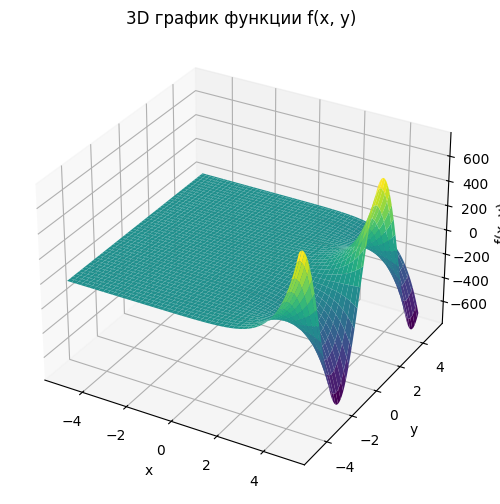

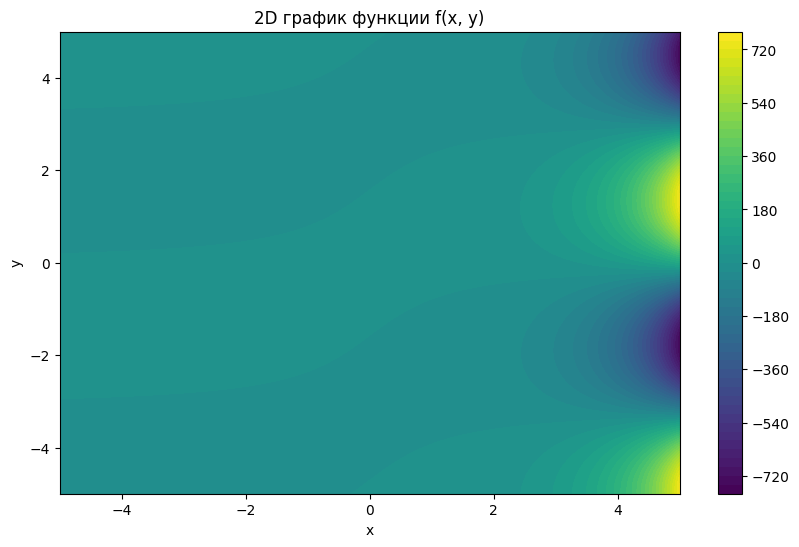

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x, y = sp.symbols('x y')
f = sp.exp(x) * (sp.cos(y) + x * sp.sin(y))

# Частные производные
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Градиент
gradient = (df_dx, df_dy)

# Вывод результатов
print("Функция f(x, y):", f)
print("Частная производная по x:\n")
sp.pprint(df_dx)
print("Частная производная по y:\n")
sp.pprint(df_dy)
print("Градиент:\n")
sp.pprint(gradient)

# Численное значение градиента в точках
points = [(0, 0), (5, 1.8), (5.5, -2)]
for point in points:
    grad_x_val = df_dx.subs({x: point[0], y: point[1]})
    grad_y_val = df_dy.subs({x: point[0], y: point[1]})
    print(f"Градиент в точке {point}: ({grad_x_val.evalf()}, {grad_y_val.evalf()})")

# Преобразование символьной функции в числовую для построения графиков
f_numeric = sp.lambdify((x, y), f, 'numpy')
df_dx_numeric = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_numeric = sp.lambdify((x, y), df_dy, 'numpy')

# График в 3D с использованием возможностей matplotlib
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_numeric(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D график функции f(x, y)')
plt.show()

# График в 2D с использованием возможностей matplotlib
x_2d = np.linspace(-5, 5, 400)
y_2d = np.linspace(-5, 5, 400)
X_2d, Y_2d = np.meshgrid(x_2d, y_2d)
Z_2d = f_numeric(X_2d, Y_2d)

plt.figure(figsize=(10, 6))
contour = plt.contourf(X_2d, Y_2d, Z_2d, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D график функции f(x, y)')
plt.show()

## Задача 3
1. Найдите прямую кинематику для данного механизма (обратите внимание на финальную систему координат).
2. Посчитайте матрицу Якоби.


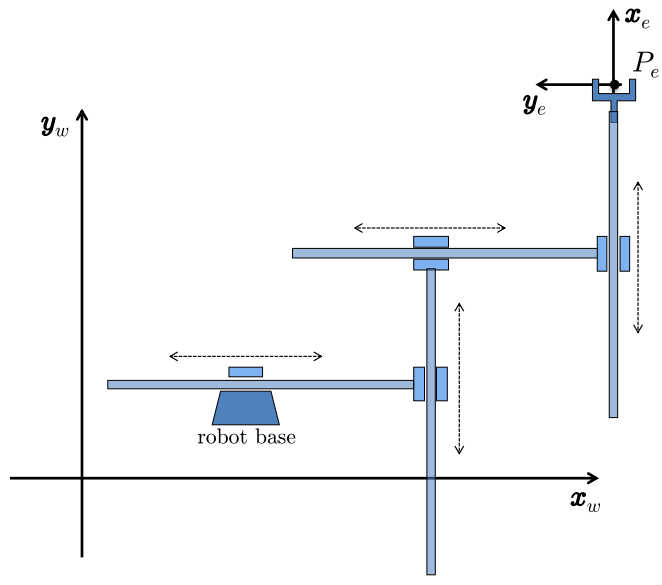import

In [12]:
import sympy as sp

# Определение символьных переменных
theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4')
l1, l2, l3, l4 = sp.symbols('l1 l2 l3 l4')

# Координаты конца манипулятора
x_pe = (
    l1 * sp.cos(theta1) +
    l2 * sp.cos(theta1 + theta2) +
    l3 * sp.cos(theta1 + theta2 + theta3) +
    l4 * sp.cos(theta1 + theta2 + theta3 + theta4)
)
y_pe = (
    l1 * sp.sin(theta1) +
    l2 * sp.sin(theta1 + theta2) +
    l3 * sp.sin(theta1 + theta2 + theta3) +
    l4 * sp.sin(theta1 + theta2 + theta3 + theta4)
)

# Прямая кинематика
print("Прямая кинематика:")
print(f"x_pe = {x_pe}")
print(f"y_pe = {y_pe}")

# Частные производные для матрицы Якоби
J11 = sp.diff(x_pe, theta1)
J12 = sp.diff(x_pe, theta2)
J13 = sp.diff(x_pe, theta3)
J14 = sp.diff(x_pe, theta4)
J21 = sp.diff(y_pe, theta1)
J22 = sp.diff(y_pe, theta2)
J23 = sp.diff(y_pe, theta3)
J24 = sp.diff(y_pe, theta4)

# Матрица Якоби
J = sp.Matrix([[J11, J12, J13, J14], [J21, J22, J23, J24]])
print("\nМатрица Якоби:")
sp.pprint(J)

Прямая кинематика:
x_pe = l1*cos(theta1) + l2*cos(theta1 + theta2) + l3*cos(theta1 + theta2 + theta3) + l4*cos(theta1 + theta2 + theta3 + theta4)
y_pe = l1*sin(theta1) + l2*sin(theta1 + theta2) + l3*sin(theta1 + theta2 + theta3) + l4*sin(theta1 + theta2 + theta3 + theta4)

Матрица Якоби:
⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂) - l₃⋅sin(θ₁ + θ₂ + θ₃) - l₄⋅sin(θ₁ + θ₂ + θ₃ +  ↪
⎢                                                                              ↪
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂) + l₃⋅cos(θ₁ + θ₂ + θ₃) + l₄⋅cos(θ₁ + θ₂ + θ₃ + θ ↪

↪ θ₄)  -l₂⋅sin(θ₁ + θ₂) - l₃⋅sin(θ₁ + θ₂ + θ₃) - l₄⋅sin(θ₁ + θ₂ + θ₃ + θ₄)  -l ↪
↪                                                                              ↪
↪ ₄)   l₂⋅cos(θ₁ + θ₂) + l₃⋅cos(θ₁ + θ₂ + θ₃) + l₄⋅cos(θ₁ + θ₂ + θ₃ + θ₄)   l₃ ↪

↪ ₃⋅sin(θ₁ + θ₂ + θ₃) - l₄⋅sin(θ₁ + θ₂ + θ₃ + θ₄)  -l₄⋅sin(θ₁ + θ₂ + θ₃ + θ₄)⎤
↪                                                                            ⎥
↪ ⋅cos(θ₁ + θ₂ + θ₃) + l₄⋅cos(θ₁ + θ₂ + θ₃ + θ₄)   l₄⋅cos(θ₁ + θ₂

# Видео 6

## Задача 1
Дан маятник Капицы и его дифференциальное уравнение

${\ddot {\varphi }}=-(a\nu ^{2}\cos \nu t+g){\frac {\sin \varphi }{l}}$
, где:
- $\nu$ — частота вынуждающих вертикальных гармонических колебаний подвеса,
- $a$ — амплитуда вынуждающих колебаний,
- $\omega _{0}={\sqrt {g/l}}$ — собственная частота колебаний математического маятника,
- $g$ — ускорение свободного падения,
- $l$ — длина стержня,
-$m$ — масса грузика.

Зависимость координат грузика от времени:
$\left\{{\begin{aligned}x&=l\sin \varphi ,\\y&=-l\cos \varphi -a\cos \nu t.\end{aligned}}\right.$



1. Найдите уравнение движения маятника (численное решение).
2. Постройте графики $y(x)$, $y(t)$, $\dot \varphi(\varphi)$, когда
$a = 0.1$,
$\nu = 25$,
$l = 1$,
$m = 1$,
$\varphi_0 = \pi$,
$\dot \varphi_0 = 0.1$.

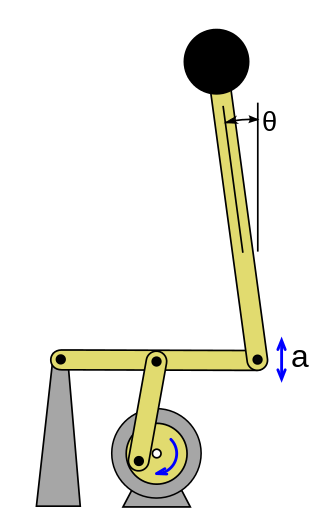